In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
pd.read_csv('Obesity Classification.csv')

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [4]:
Obesity = pd.read_csv('Obesity Classification.csv')

In [5]:
#missing values
Obesity.isnull().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [6]:
#To convert Categorical dataset to Numerical, we have to encode each column
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()

In [8]:
Obesity['Gender'] = le.fit_transform(Obesity['Gender'])

In [10]:
#Remove unwanted columns
Obesity=Obesity.drop(columns=['ID'])

In [12]:
Obesity

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,Normal Weight
1,30,0,160,60,22.5,Normal Weight
2,35,1,180,90,27.3,Overweight
3,40,0,150,50,20.0,Underweight
4,45,1,190,100,31.2,Obese
...,...,...,...,...,...,...
103,11,1,175,10,3.9,Underweight
104,16,0,160,10,3.9,Underweight
105,21,1,180,15,5.6,Underweight
106,26,0,150,15,5.6,Underweight


In [13]:
lowerLimit = Obesity['Age'].quantile(0.00)
upperLimit = Obesity['Age'].quantile(0.97)
lowerLimit

11.0

In [14]:
upperLimit

102.78999999999999

In [15]:
Obesity['Age'] = Obesity['Age'].clip(lowerLimit, upperLimit)

<Axes: ylabel='Age'>

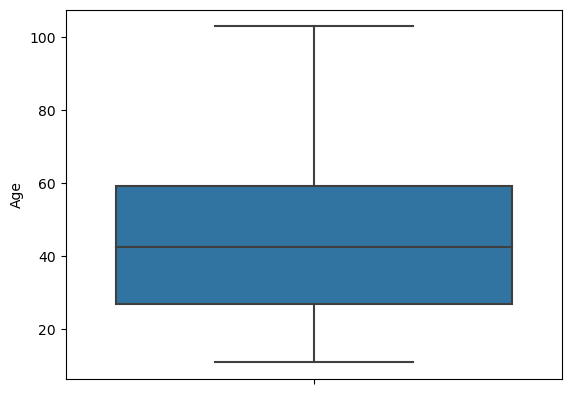

In [16]:
#Eliminate outliers
sns.boxplot(y='Age', data=Obesity)

<Axes: ylabel='Height'>

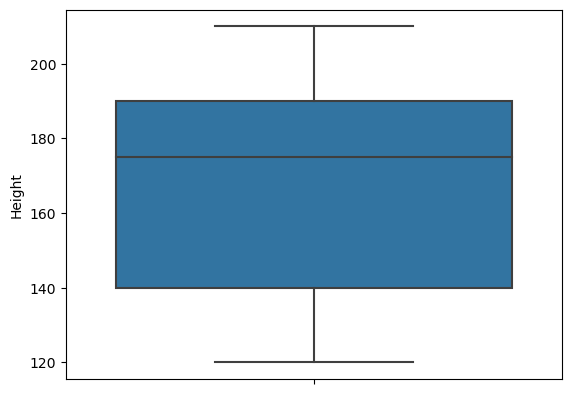

In [17]:
sns.boxplot(y='Height', data=Obesity)

<Axes: ylabel='Weight'>

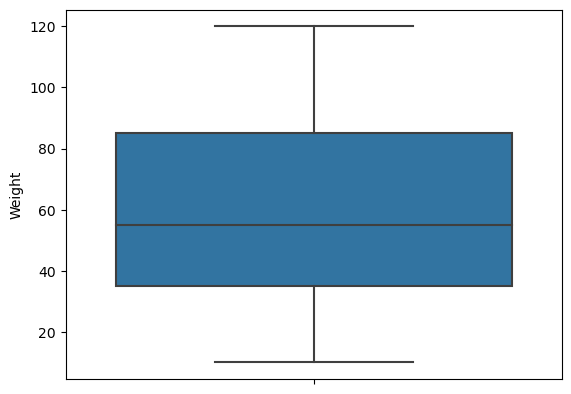

In [18]:
sns.boxplot(y='Weight', data=Obesity)

<Axes: ylabel='BMI'>

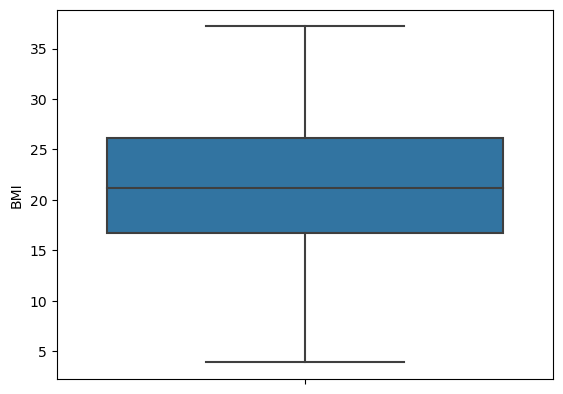

In [19]:
sns.boxplot(y='BMI', data=Obesity)

In [20]:
Obesity.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

In [21]:
X=Obesity[['Age', 'Gender', 'Height', 'Weight', 'BMI']]

In [22]:
Y=Obesity['Label']

In [23]:
#Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [24]:
#To model our dataset with the SVM machine learning algorithm, we import the SVC class from sklearn.svm

from sklearn.svm import SVC

In [25]:
#Then we create our model object from the SVC class
clf = SVC(kernel='rbf',C=1)

In [26]:
#We train our model with the dataset below

clf.fit(X_train,Y_train)

SVC(C=1)

In [27]:
#So after training, you can now predict outputs using the model.
Y_pred = clf.predict(X_test)


In [28]:
Y_pred

array(['Obese', 'Normal Weight', 'Underweight', 'Normal Weight',
       'Overweight', 'Underweight', 'Overweight', 'Underweight',
       'Underweight', 'Underweight', 'Overweight', 'Underweight',
       'Overweight', 'Underweight', 'Overweight', 'Underweight',
       'Normal Weight', 'Overweight', 'Normal Weight', 'Normal Weight',
       'Underweight', 'Normal Weight', 'Normal Weight', 'Underweight',
       'Underweight', 'Underweight', 'Normal Weight'], dtype=object)

In [29]:
#Now to evaluate the model’s prediction, because it is a classification algorithm, we use the confusion_matrix or 
#accuracy_score or classification_report.

from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[6, 0, 1, 4],
       [0, 1, 1, 0],
       [1, 0, 4, 0],
       [1, 0, 0, 8]], dtype=int64)

In [30]:
accuracy_score(Y_test,Y_pred)

0.7037037037037037

In [31]:
#Then we can visualize the results using heatmap below
cm = confusion_matrix(Y_test, Y_pred)

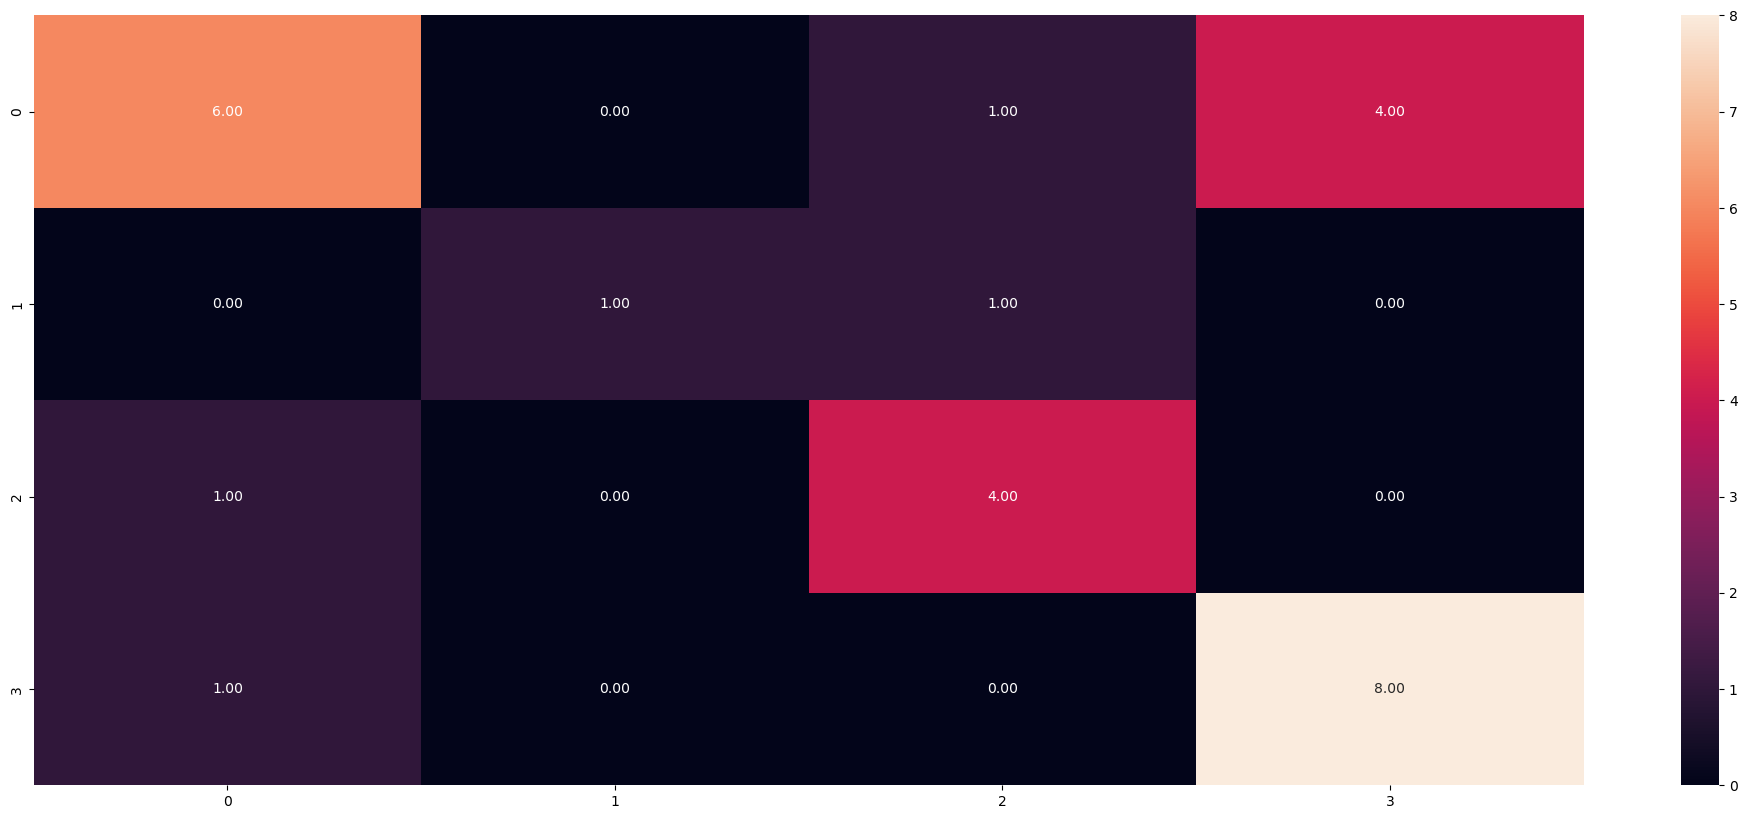

In [32]:
# Visualize the confusion matrix using Seabornsns.heatmap(cm, annot=True, fmt="d")
plt.figure(figsize=(25,10))
sns.heatmap(cm, annot=True, fmt=".2f")
plt.show()

In [ ]:
#Random Forest 

In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [35]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [36]:
#So after training, you can now predict outputs using the model.
A_pred = model.predict(X_test)

In [37]:
A_pred

array(['Obese', 'Normal Weight', 'Underweight', 'Normal Weight',
       'Overweight', 'Underweight', 'Obese', 'Normal Weight',
       'Underweight', 'Underweight', 'Overweight', 'Underweight',
       'Overweight', 'Underweight', 'Normal Weight', 'Underweight',
       'Overweight', 'Overweight', 'Normal Weight', 'Normal Weight',
       'Normal Weight', 'Underweight', 'Normal Weight', 'Normal Weight',
       'Underweight', 'Normal Weight', 'Normal Weight'], dtype=object)

In [38]:
#Now to evaluate the model’s prediction, because it is a classification algorithm, we use the confusion_matrix or 
#accuracy_score or classification_report.

from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(Y_test,A_pred)

array([[11,  0,  0,  0],
       [ 0,  2,  0,  0],
       [ 0,  0,  5,  0],
       [ 0,  0,  0,  9]], dtype=int64)

In [39]:
accuracy_score(Y_test,A_pred)

1.0

In [45]:
feature_scores = pd.Series(model.feature_importances_, index=X_test.columns).sort_values(ascending=False)

In [46]:
feature_scores

BMI       0.463398
Weight    0.365999
Height    0.091889
Age       0.065356
Gender    0.013358
dtype: float64

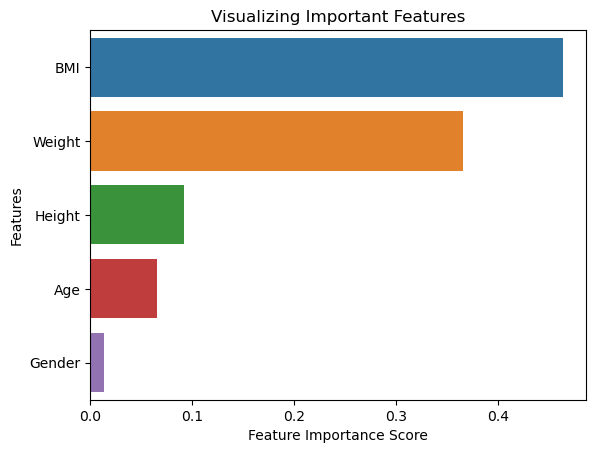

In [47]:
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()